<a href="https://colab.research.google.com/github/imazzala/coder-house-ds1/blob/main/ProyectoParteIII_Mazzalay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

photo-1533664488202-6af66d26c44a.avif



# Abstract

La cancelación del servicio de clientes (churn) en telecomunicaciones impacta directamente en ingresos y costos de adquisición de las empresas. En el contexto profesional en que me desenvuelvo, comprender y anticipar el churn es crítico para diseñar acciones de retención efectivas. Para este trabajo selecciono el dataset Telco Customer Churn publicado en Kaggle: contiene ~7000 clientes y 21 variables que describen la demografía básica, los servicios contratados, el esquema de facturación y variables de cuenta, además de la etiqueta Churn (cliente se fue/no se fue) del último mes. Es un estándar la medición de churn en telecomunicaciones, con documentación suficiente y variables alineadas al negocio (Contract, PaymentMethod, InternetService, tenure, MonthlyCharges, TotalCharges), lo que habilita un análisis explicable y generalizable a la realidad.

El objetivo general es explorar y explicar los factores asociados a la baja de clientes y derivar lineamientos accionables de retención. Los objetivos específicos son:
1. realizar un análisis de la calidad de los datos (valores perdidos, tipos y codificaciones);
2. construir un EDA dirigido por hipótesis con visualizaciones multivariadas que conecten condiciones contractuales, uso de servicios e ingresos con la probabilidad de churn;
3. documentar conclusiones preliminares y preguntas para profundizar en fases posteriores.

El entregable de esta primera etapa incluirá: abstract, preguntas/hipótesis, diagnóstico de datos (valores perdidos y tipos), resúmenes numéricos que sustenten hallazgos y conclusiones preliminares enlazadas a las hipótesis.

## Hipótesis

P1. ¿Los clientes con contratos Month-to-month presentan mayor churn que los de One/Two year?

H1: Los clientes con contrato mensual tienden a abandonar más que los de largo plazo.

P2. ¿Métodos de pago electronic check y paperless billing se asocian a mayor churn frente a pagos automáticos (credit card/ bank transfer)?

H2: Los clientes que pagan por electronic check o con facturación sin papel presentan más churn que los que utilizan pagos automáticos.

P3. ¿Mayor tenure (antigüedad) reduce la probabilidad de churn?

H3: A mayor antigüedad, menor probabilidad de baja.

P4. ¿Tener TechSupport y/o OnlineSecurity reduce el churn entre clientes de Internet?

H4: Los clientes con soporte técnico y/o seguridad en línea presentan menor churn que aquellos sin estos servicios.

P5. ¿El servicio Fiber optic presenta mayor churn relativo a DSL, a igual nivel de cargo mensual?

H5: Los clientes con fibra óptica tienden a presentar más churn que los de DSL.

P6. ¿Las combinaciones (Contract × PaymentMethod) muestran patrones claros de mayor o menor churn?

H6: Existen combinaciones específicas de contrato, método de pago que concentran más churn.

# 1. Análisis de los datos


In [1]:
# Se importan las librerías a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
# Se lee el DataFrame y se valida que cargue correctamente
df = pd.read_csv('https://raw.githubusercontent.com/imazzala/coder-house-ds1/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Se analiza el dataframe para analizar si hay elementos nulos y tener una visión general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Se analiza la cantidad de filas y columnas
num_filas, num_cols = df.shape
print(f"El dataset tiene {num_filas} filas y {num_cols} columnas")

El dataset tiene 7043 filas y 21 columnas


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Se obtiene el nombre de las columnas para poder utilizarlas más adelante
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Se verifica si hay duplicidad de registros de Números de clientes para asegurar no duplicar información. Luego de validar, se observan registros únicos
df['customerID'].duplicated().sum()

np.int64(0)

In [8]:
# Se analizan las columnas numéricas. Se puede verificar que los datos de la columna SeniorCitizen en realidad son categorías
# correspondientes a 1 : Sí y 0 : No.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Se modifican las etiquetas de Churn codificándolas en valores 0 -> No, 1 -> Sí. El objetivo es preparar las columnas para su uso posterior.
# Se valida que la transformación sea efectiva, utilizando el método describe.
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df.describe()

/tmp/ipython-input-1792095674.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
/tmp/ipython-input-1792095674.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


# 2. EDA

Se realiza un análisis exploratorio de los datos con el objetivo de identificar valores nulos, composición de los datos en las columnas categóricas, y análisis de las variables numéricas.

In [10]:
# Analizo si existen valores nulos, se verifica que no hay valores nulos como tal.
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Se analiza el contenido de las columnas para verificar los datos que contienen:


In [11]:
# Se analizan las categorías definidas en las columnas categóricas
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

Se identifica una serie de valores definidos como NaN en la columna TotalCharges:

In [13]:
# Se identifica que la columna cuenta con datos del tipo object.
df['TotalCharges'].info()
print(' \n--------- Casting a numeric type ---------\n')
# Se transforman los datos datos a tipo numérico.
# Se analiza la existencia de valores nulos.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB
 
--------- Casting a numeric type ---------



,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
# Se filtran los datos NaN para analizar los datos. Se verifica que corresponden con tenure 0, es decir, son clientes nuevos que aún no han realizado el pago
# de su primer mes de facturación.
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [15]:
# Se analizan las medidas de tendencia central para elegir que valor imputar
total_charges_mean = df['TotalCharges'].mean()
total_charges_median = df['TotalCharges'].median()
total_charges_mode = df['TotalCharges'].mode()
print(f' El valor medio de total charges es: {total_charges_mean}')
print(f' La mediana de total charges es: {total_charges_median}')
print(f' La moda de total charges es: {total_charges_mode}')

 El valor medio de total charges es: 2283.3004408418656
 La mediana de total charges es: 1397.475
 La moda de total charges es: 0    20.2
Name: TotalCharges, dtype: float64


In [16]:
# Se verifica que tenemos dos modas coincidiendo la segunda con la mediana, por lo tanto, se elige la mediana para imputar los valores faltantes
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-2887635468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [17]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [18]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [21]:
# Analizo las variables numéricas
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Analizo el Churn por Género

In [22]:
# Verifico clientes que efectivamente dieron de baja el servicio agrupado por genero. Se verifica que No hay diferencias significativas entre las categorías.
df['Churn'][df['Churn'] == 1].groupby(by=df['gender']).count()

,Churn
gender,
Female,939
Male,930


## Visualizaciones
### Análisis gráfico de variables categóricas

In [23]:
sns.set_style('whitegrid')
color = sns.color_palette(palette='tab10')

/tmp/ipython-input-2516010145.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Contract', hue='Churn', data=df, palette=color)


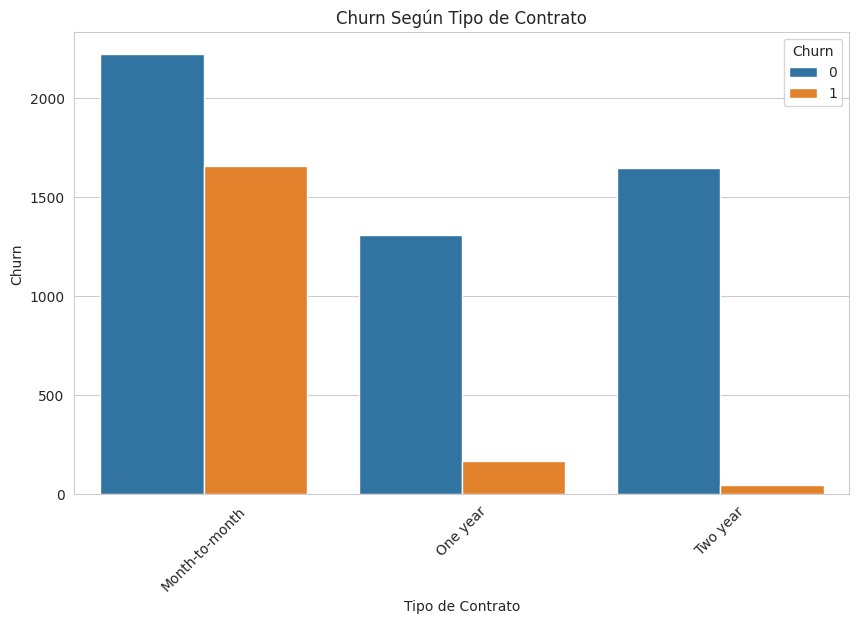

In [24]:
# Se analiza el churn según el tipo de contrato seleccionado. Se verifica que el mayor churn se da en aquellos clientes que tienen un contrato mensual.
# Este comportamiento se condice con lo estipulado en la hipótesis H1.
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette=color)
plt.title('Churn Según Tipo de Contrato')
plt.xticks(rotation=45)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Churn')
plt.show()

/tmp/ipython-input-1568171419.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette=color)


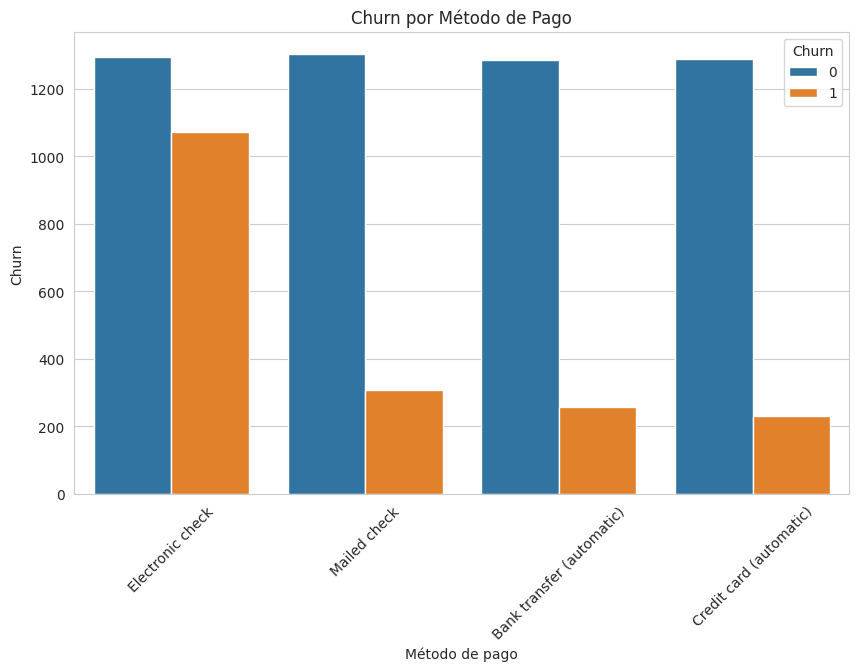

In [25]:
# Se analiza el churn según los diferentes métodos de pago. Se verifica que se comprueba la hipótesis.
# Los medios de pago automáticos poseen menor tasa de churn que los médios manuales
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette=color)
plt.title('Churn por Método de Pago')
plt.xticks(rotation=45)
plt.xlabel('Método de pago')
plt.ylabel('Churn')
plt.show()

/tmp/ipython-input-1598034429.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='TechSupport', hue='Churn', data=df, palette=color)


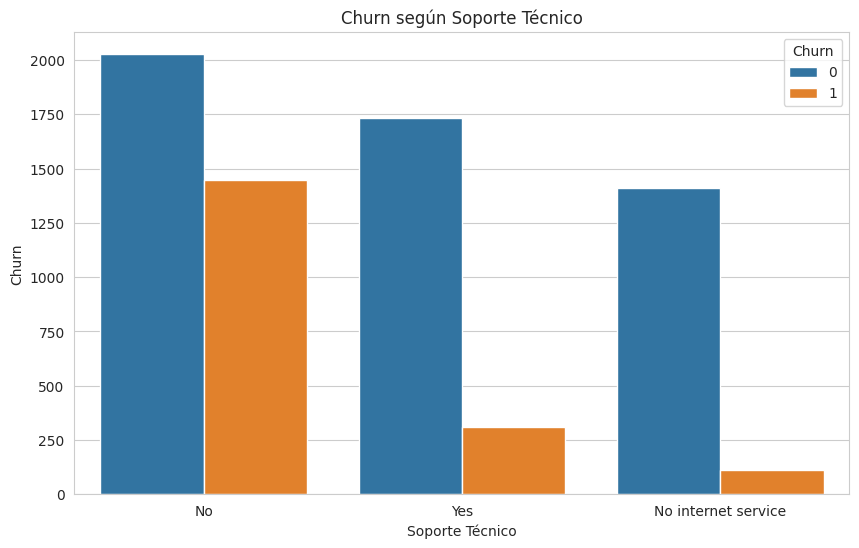

In [26]:
# Se analiza el churn en función si los clientes contratan el servicio técnico o no. Se observa que aquellos
# que no contratan el servicio técnico, tienen mayor tasa de churn.
plt.figure(figsize=(10, 6))
sns.countplot(x='TechSupport', hue='Churn', data=df, palette=color)
plt.title('Churn según Soporte Técnico')
plt.xlabel('Soporte Técnico')
plt.ylabel('Churn')
plt.show()

/tmp/ipython-input-73022517.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette=color)


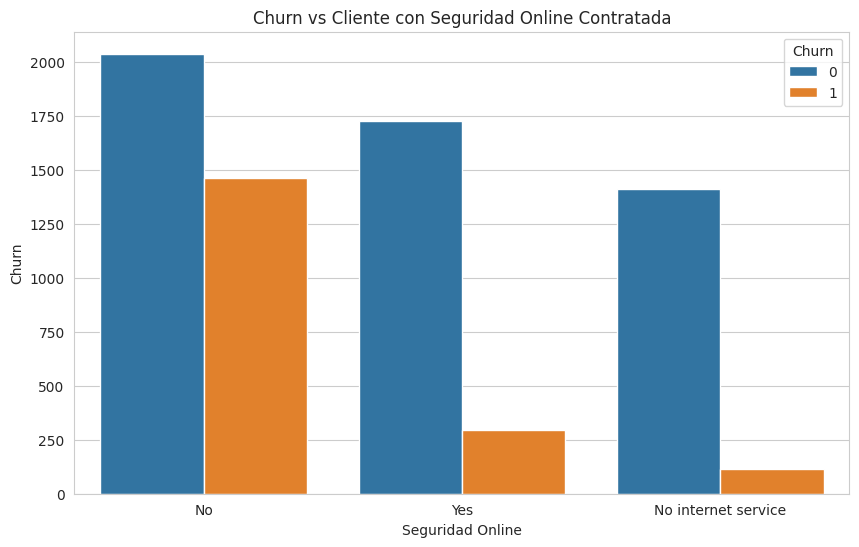

In [27]:




# Se analiza el churn según si el cliente tiene contratado el servicio de seguridad online.
# Se verifica que aquellos clientes que no tienen contratado el servicio de seguridad online
# tienen mayor tasa de churn.
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette=color)
plt.title('Churn vs Cliente con Seguridad Online Contratada')
plt.xlabel('Seguridad Online')
plt.ylabel('Churn')
plt.show()

/tmp/ipython-input-3617483561.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='InternetService', hue='Churn', data=df, palette=color)


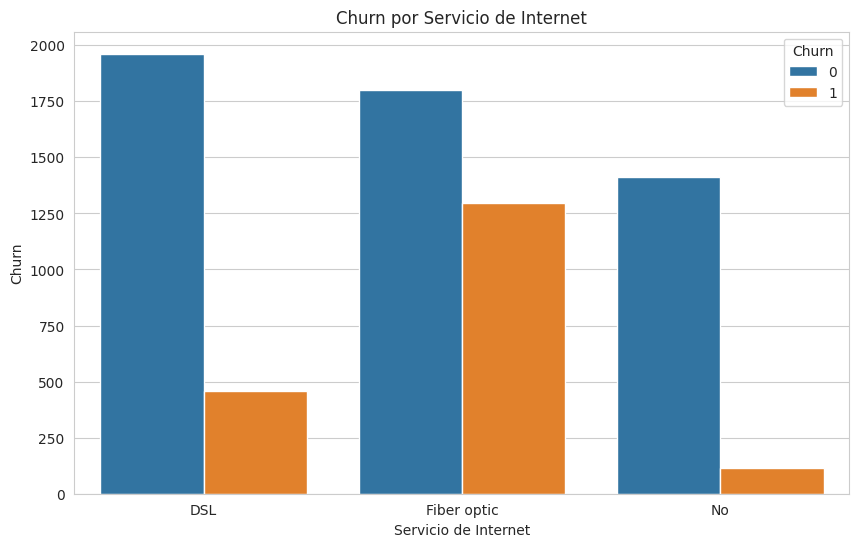

In [28]:
# Se analiza el churn según el tipo de servicio de internet contratado. Se observa que aquellos que contratan
# fibra óptica, tienen mayor churn que aquellos que que contratan DSL. Esto puede tener relación con la calidad
# del servicio
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette=color)
plt.title('Churn por Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Churn')
plt.show()

## Análisis de variables numéricas

Analizo la distribución de las variables numéricas MonthlyCharges	y TotalCharges.

/tmp/ipython-input-1457059674.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=df, x='TotalCharges',hue='Churn',  kde=True, palette=color)


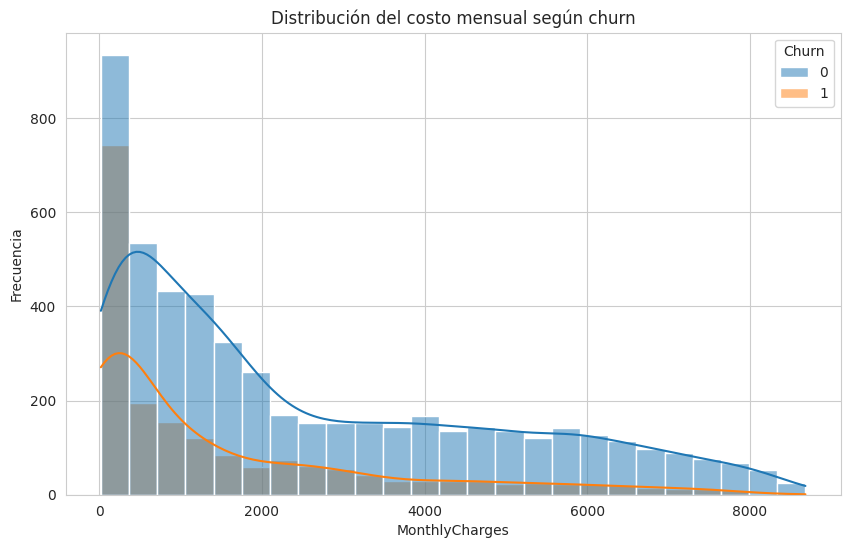

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalCharges',hue='Churn',  kde=True, palette=color)
plt.title('Distribución del costo mensual según churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipython-input-3097294654.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=df, x='MonthlyCharges', hue='Churn',  kde=True, palette=color)


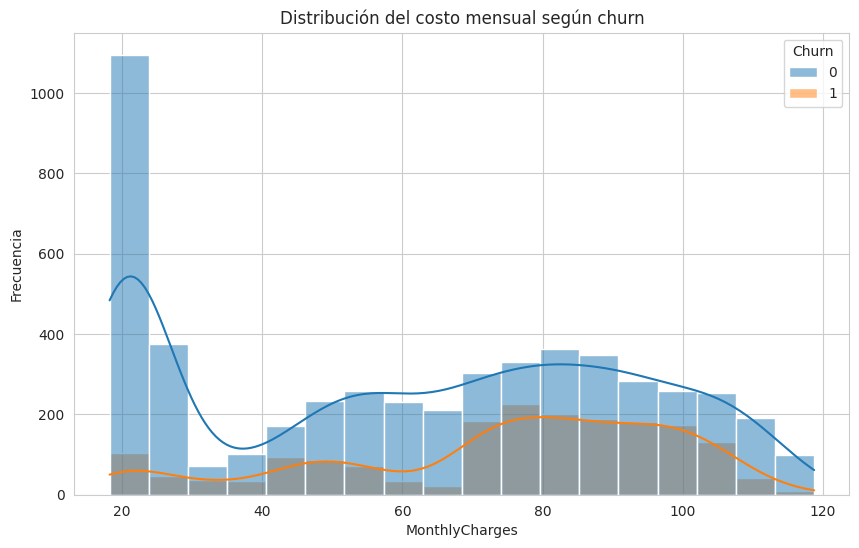

In [30]:
# Se analiza la distribución del chunr según el costo mensual. Se observa que los clientes con mayor facturacion
# son más propensos a cancelar sel servicio.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn',  kde=True, palette=color)
plt.title('Distribución del costo mensual según churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipython-input-95978707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette=color),
/tmp/ipython-input-95978707.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Churn', y='tenure', palette=color),


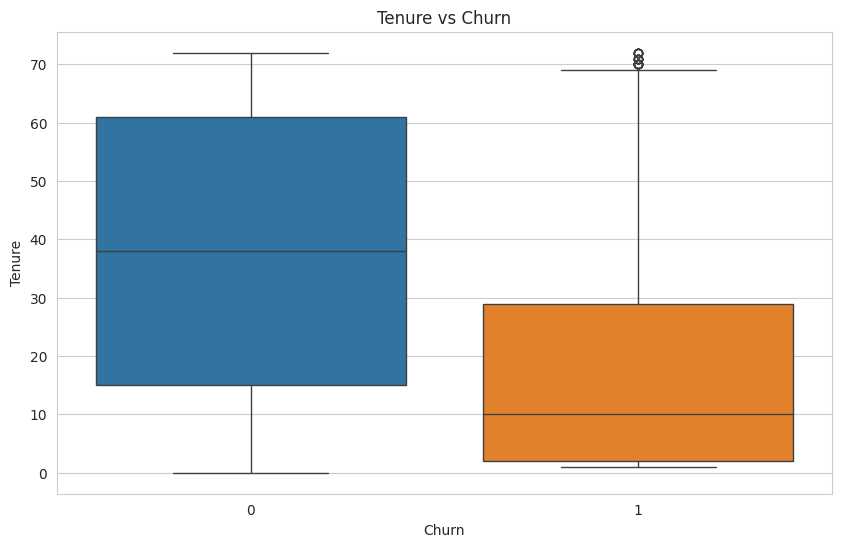

In [31]:
# Se analizan los outliers de los clientes en función de la antiguedad (tenure) de los clientes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure', palette=color),
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

Se observa que dentro de los clientes que se dan de baja poseen outliers en el tenure. Se realiza un análisis de los cuartiles para identificar dichos clientes:

In [32]:

# Calculo los cuartiles 1 y 3 para obtener el Rango Inter Cuartil (IQR) y caculo los límites superior e inferior
Q1 = df[df['Churn'] == 1]['tenure'].quantile(0.25)
Q3 = df[df['Churn'] == 1]['tenure'].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

2.0
29.0
27.0
-38.5
69.5


In [33]:
df[df['tenure'] >= upper_bound]['tenure'].unique()

array([71, 72, 70])

In [34]:
# Obtengo los datos asociados a los outliers
outliers = df[(df['Churn'] == 1) & (df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]
outliers.info()

total_churn = len(df[df['Churn'] == 1])
total_outliers = len(outliers)

outliers_percent = (total_outliers / total_churn) * 100
print(f'Los outliers asociados al tenure vinculado con churn se corresponde con un {outliers_percent}% del dataframe')

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 17 to 7039
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        651 non-null    object 
 1   gender            651 non-null    object 
 2   SeniorCitizen     651 non-null    int64  
 3   Partner           651 non-null    object 
 4   Dependents        651 non-null    object 
 5   tenure            651 non-null    int64  
 6   PhoneService      651 non-null    object 
 7   MultipleLines     651 non-null    object 
 8   InternetService   651 non-null    object 
 9   OnlineSecurity    651 non-null    object 
 10  OnlineBackup      651 non-null    object 
 11  DeviceProtection  651 non-null    object 
 12  TechSupport       651 non-null    object 
 13  StreamingTV       651 non-null    object 
 14  StreamingMovies   651 non-null    object 
 15  Contract          651 non-null    object 
 16  PaperlessBilling  651 non-null    object 
 17  

Se verifica que existen 651 registros de churn positivo asociados a la antiguedad del cliente, que analizados desde la perspectiva de la antiguedad se consideran outliers. Estos clientes representan el 34% de los datos de churn positivo. Se decide no realizar imputaciones ya que sería una distorsión importante para los datos de entrenamiento.


In [35]:
outliers['tenure'].unique()

array([71, 72, 70])

De los outliers encontrados, se verifica que existen 3 valores de tenure que entran dentro de la categoría de outliers, pero dada su afectación, se decide mantenerlos.

Por otro lado, se observa que la mayor concentración de bajas, se encuentra en clientes cuyo tenure está entre los 2 y los 29 meses. Tenure mayores tienden a tener menos tasa de churn.

### Análisis de la relación entre Churn, Servicio de Internet Contratado y Monto Mensual

Se realiza utiliza un scatterplot para analizar la relación entre el tenure de los clientes y el costo mensual, segmentado por el tipo de Servicio de Internet y el churn.

Se verifica cierta correlación entre churn y tenure dentro del servicio de Fibra Óptica que se deberá analizar en profundidad.

Text(0.5, 0.98, 'Tenure vs MonthlyCharges por InternetService')

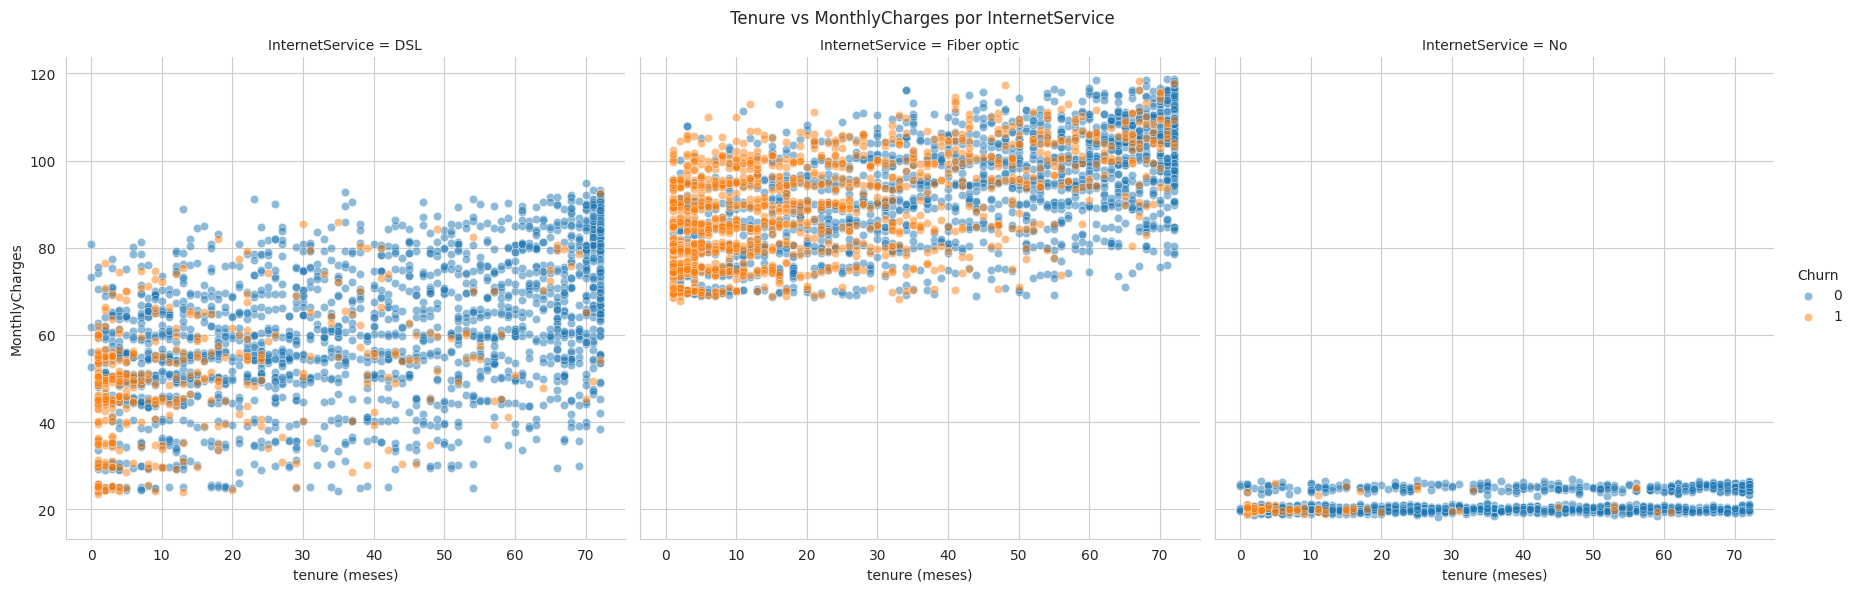

In [36]:
g = sns.FacetGrid(
    data=df,
    col="InternetService",
    hue="Churn",
    col_wrap=3,
    height=6,

    palette=color
)

g.map_dataframe(
    sns.scatterplot,
    x="tenure",
    y="MonthlyCharges",
    alpha=0.5
)

g.add_legend(title="Churn")
g.set_axis_labels("tenure (meses)", "MonthlyCharges")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Tenure vs MonthlyCharges por InternetService")



### Análisis de la proporción entre Churn, Método de Pago, y Tipo de Contrato

Se observa que la proporción de clientes con contrato mensual y método de pago Cheque electrónico, tiene la mayor tasa de churn con alrededor del 55% de los contatratados.

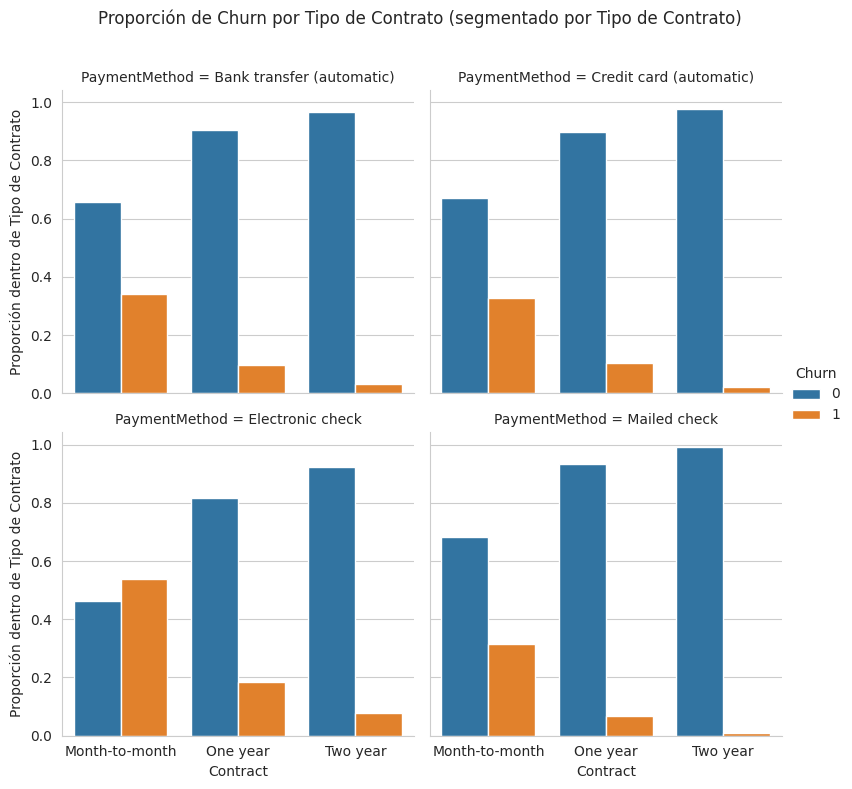

In [37]:
# Agrupo los datos para ajustar las proporciones en los gráficos.
tmp = (
    df.groupby(["PaymentMethod", "Contract", "Churn"], dropna=False)["customerID"]
      .count().reset_index(name="n")
)
tmp["group_total"] = tmp.groupby(["PaymentMethod","Contract"])["n"].transform("sum")
tmp["prop"] = tmp["n"] / tmp["group_total"]

# Se aplica un catplot para ver la agrupación por categoria

g3 = sns.catplot(
    data=tmp,
    x="Contract",
    y="prop",
    hue="Churn",
    col="PaymentMethod",
    kind="bar",
    height=4,
    aspect=1.0,
    col_wrap=2
)

g3.set_axis_labels("Contract", "Proporción dentro de Tipo de Contrato")
g3.fig.subplots_adjust(top=0.88)
g3.fig.suptitle("Proporción de Churn por Tipo de Contrato (segmentado por Tipo de Contrato)")

plt.show()


## Conclusiones preliminares

Del análisis preliminar se pueden identificar ciertas relaciones que permiten predecir la probabilidad de un cliente de dar de baja el servicio.

Se observa que:

1. El método de pago no automático, el servicio de fibra óptica y el monto mensual que pagan los clientes muestran cierta tendencia hacia el churn de los clientes.
2. Tenure altos tienen la tendencia de tener menor churn que aquellos clientes de menor antigüedad.
3. Tipos de contrato mensuales y de menor duración tienen mayor tasa de churn que aquellos con contratos mas largos.
4. Aquellos clientes que contratan servicios adicionales como el servicio de seguridad online o el servicio de soporte técnico, tienen menores tasa de churn que aquellos que no.





# Modelo Predictivo ML

## 1. Hipótesis




#### **Hipótesis Nula (H0)**: Las características históricas disponibles de los clientes (tenure o antigüedad, facturación, servicio contratado, etc.) no son suficientes para predecir el churn del servicio con una precisión significativamente mejor que el azar.

#### **Hipótesis Alternativa (H1)**: Es posible construir un modelo de clasificación utilizando las características históricas de los clientes que prediga el churn del servicio con una precisión y AUC (Area Under Curve) significativamente superiores al 50% (azar). se espra alcanzar alcanzar una precisión > 75%.



## 2. Continuación EDA

### 2.1 Análisis de distribución de la variable objetivo (churn)

Se analiza la distribución de la variable objetivo. Se observa que el dataset no se encuentra balanceado.

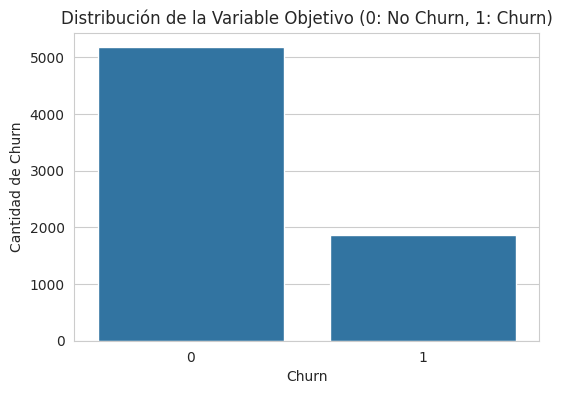

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de la Variable Objetivo (0: No Churn, 1: Churn)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Churn')
target_dist = df['Churn'].value_counts(normalize=True) * 100

plt.show()

### 2.2 Análisis de variables




Elimino la columna **'customerID'** ya que no brinda información relevante

In [39]:
df.drop(columns=['customerID'], inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


Genero una nueva categoría de datos con el tenure de los clientes con el objetivo de reducir el ruido del dataset.

In [40]:
bins = [0, 6, 12, 24, 36, 48, 60, 72, 84]
labels = ['0 a 6 meses', '1 año', '2 años','3 años', '4 años', '5 años', '6 años', '7 años']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

print("Nueva columna 'tenure_group' creada a partir de 'tenure':")
display(df[['tenure', 'tenure_group']].head())

print("\nConteo de clientes en cada grupo de tenure:")
df['tenure_group'].value_counts()



Nueva columna 'tenure_group' creada a partir de 'tenure':


,tenure,tenure_group
0,1,0 a 6 meses
1,34,3 años
2,2,0 a 6 meses
3,45,4 años
4,2,0 a 6 meses



Conteo de clientes en cada grupo de tenure:


,count
tenure_group,
0 a 6 meses,1371
6 años,1121
2 años,1047
3 años,876
5 años,820
4 años,748
1 año,698
7 años,362


Separo las variables numéricas de las categóricas para trabajar con ellas de forma independiente.

In [41]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Separo ahora las variables categóricas y filtro las numéricas para poder quedarme con aquellas variables numéricas continuas y poder realizar una análisis de correlación:




In [42]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling','PaymentMethod','Churn']

numerical_continuous = [feature for feature in numerical_features if feature not in categorical_cols]

In [43]:

numerical_continuous

['tenure', 'MonthlyCharges', 'TotalCharges']

### 2.3 Matriz de correlacion

Se analiza la correlación entre la variable objetivo, en este caso el Churn y las variables numéricas continuas.

*   No se observa correlación fuerte entre el churn y el resto de las variables.
*   Se observa una correlación fuerte entre Tenure y TotalCharges, lo cual es esperable ya que TotalCharges está asociado al monto total facturado a cada cliente. A mayor tenure, mayor facturación total.



In [44]:
# Incluimos 'Churn' para ver correlaciones con la variable objetivo
corr_features = numerical_continuous + ['Churn']
correlation_matrix = df[corr_features].corr()

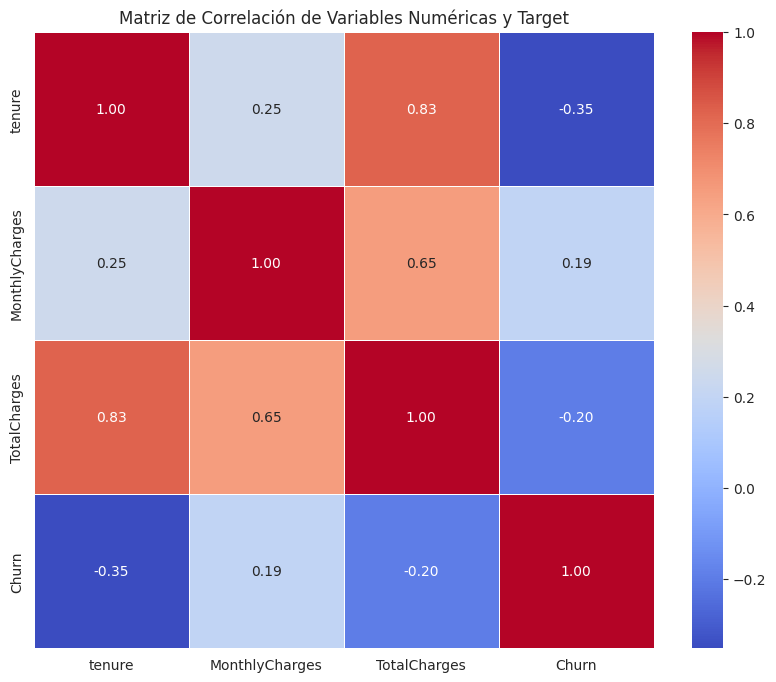

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

In [46]:
print("Correlaciones con la variable 'Churn':")
correlation_matrix['Churn'].sort_values(ascending=False)

Correlaciones con la variable 'Churn':


,Churn
Churn,1.000000
MonthlyCharges,0.193356
TotalCharges,-0.199037
tenure,-0.352229


Dado que no se observan correlaciones fuertes entre los factores, se implementará una selección automática de factores utilizando Sequential Feature Selection (SFS)

## 3. Modelo de Clasificación

### 3.1  Estratificación de Datos

In [47]:
# Separación de Features - Churn como variable objetivo. Elimino tenure para probar con la nueva feature agrupada

X = df.drop(columns=["Churn", 'tenure'])
Y = df["Churn"]

# Separación de datos en Datos de Entrenamiento y Prueba

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {Y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {Y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (4930, 19)
Tamaño del conjunto de prueba (X_test): (2113, 19)
Tamaño del conjunto de entrenamiento (y_train): (4930,)
Tamaño del conjunto de prueba (y_test): (2113,)


In [48]:
print("\nDistribución de la variable objetivo en Train vs Test:")
print(f"Train: \n{Y_train.value_counts(normalize=True)}")
print(f"Test: \n{Y_test.value_counts(normalize=True)}")


Distribución de la variable objetivo en Train vs Test:
Train: 
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Test: 
Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


### 3.2 Preprocesamiento

In [49]:
numeric_feature_for_scaling = numerical_continuous.copy()
numeric_feature_for_scaling.remove('tenure')
categorical_features_for_encoding = categorical_cols.copy() + ['tenure_group']
categorical_features_for_encoding.remove('Churn')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_feature_for_scaling),
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_features_for_encoding)
    ],
    remainder='passthrough'
)

### 3.3 Estimadores

Se utiliza SFS para identificar las características

In [50]:
lr = LogisticRegression(max_iter=1000,solver='liblinear')

sfs = SequentialFeatureSelector(
    estimator= lr,
    n_features_to_select="auto",   # o un entero, por ejemplo: 30
    direction="forward",
    scoring="accuracy",
    cv=5
)

### 3.4 Creación de pipeline Final

In [51]:
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("sfs", sfs),
    ("classifier", LogisticRegression(max_iter=1500, solver='liblinear'))
    #('classifier', KNeighborsClassifier(n_neighbors=5))
])


In [52]:
final_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'tenure_group'])])),
                ('sfs',
                 SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                                        solver='liblinear'),
                                           scoring='accuracy')),
                ('classifier',
                 LogisticRegression(max_iter=1500, solver='liblinear'))])

## 4. Evaluación del Modelo

In [53]:
# Predicciones sobre datos de prueba
y_pred = final_pipeline.predict(X_test)
y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1]

### 4.1 Accuracy

In [54]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"--- Accuracy Score ---")
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

--- Accuracy Score ---
Accuracy en el conjunto de prueba: 0.7951


### 4.2 Matriz de confusión


--- Matriz de Confusión ---


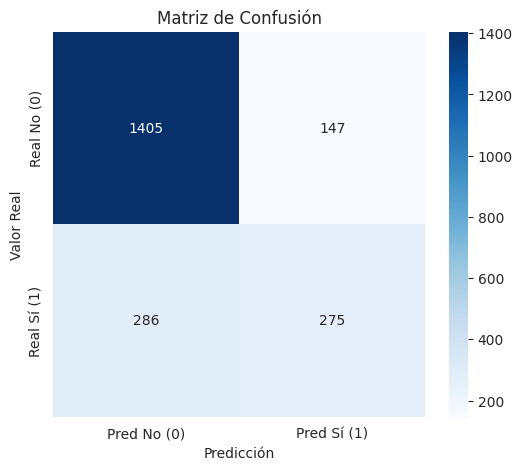

Verdaderos Negativos (TN): 1405
Falsos Positivos (FP): 147
Falsos Negativos (FN): 286
Verdaderos Positivos (TP): 275


In [55]:
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No (0)', 'Pred Sí (1)'], yticklabels=['Real No (0)', 'Real Sí (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
print(f"Verdaderos Negativos (TN): {cm[0,0]}")
print(f"Falsos Positivos (FP): {cm[0,1]}")
print(f"Falsos Negativos (FN): {cm[1,0]}")
print(f"Verdaderos Positivos (TP): {cm[1,1]}")

### 4.3 Reporte de Clasificación

In [56]:
target_names = ['No Churn (0)', 'Sí Churn (1)']
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

No Churn (0)       0.83      0.91      0.87      1552
Sí Churn (1)       0.65      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.78      2113



### 4.4 Curva ROC

In [57]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

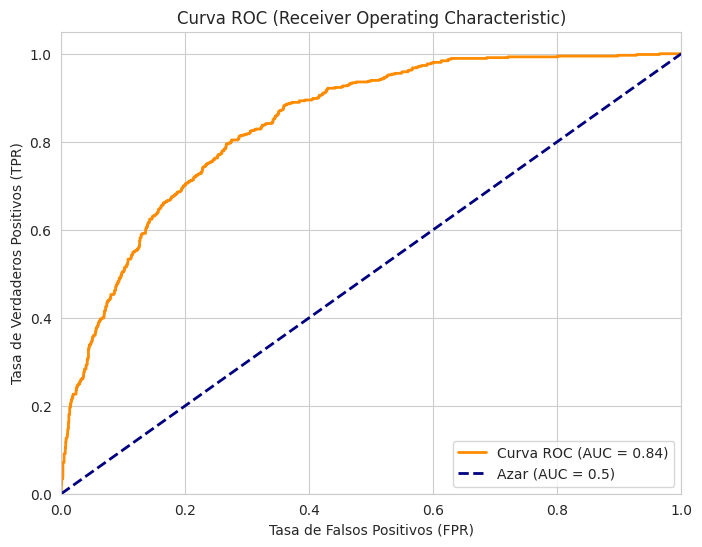

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

### 4.5 Análisis de Importancia de Características

Dado que el modelo de LogisticRegression no posee el método feature_importances_ se analizan los **coeficientes del modelo** y los **Odds Ratios**.

In [59]:
# Obtengo los componentes procesados del Pipeline
final_lr = final_pipeline.named_steps['classifier']
final_sfs = final_pipeline.named_steps['sfs']
preproc = final_pipeline.named_steps['preprocessor']

In [60]:
# Obtengo el listado de features
num_feats = numeric_feature_for_scaling
cat_feats = preproc.named_transformers_['cat'].get_feature_names_out()
all_feats = np.concatenate([num_feats, cat_feats])

In [61]:
# Obtengo los features seleccionados por SFS
selected_mask = sfs.get_support()
selected_feates = all_feats[selected_mask]

In [62]:
# Obtengo el listado de coefiecientes ordenados. Obtengo los valores absolutos para ordernar los factores por peso independientemente de si son positivos o negativos
coef = final_lr.coef_[0]
feat_importance = pd.DataFrame({
    'Feature': selected_feates,
    'coef': coef,
    'abs_coef': np.abs(coef)
}).sort_values(by='abs_coef', ascending=False)

feat_importance.head(20)


,Feature,coef,abs_coef
14,Contract_Two year,-1.568629,1.568629
25,tenure_group_7 años,-1.455379,1.455379
18,tenure_group_0 a 6 meses,1.345231,1.345231
7,InternetService_Fiber optic,1.266309,1.266309
13,Contract_One year,-0.833014,0.833014
6,InternetService_DSL,0.688810,0.688810
19,tenure_group_1 año,0.628191,0.628191
15,PaperlessBilling_No,-0.572553,0.572553
24,tenure_group_6 años,-0.547520,0.547520
8,OnlineSecurity_No,0.477762,0.477762


In [63]:
# Obtengo los Odds_ratios
feat_importance['Odds_ratio'] = np.exp(feat_importance['coef'])
feat_importance.sort_values(by='Odds_ratio', ascending=False).head(15)

,Feature,coef,abs_coef,Odds_ratio
18,tenure_group_0 a 6 meses,1.345231,1.345231,3.839075
7,InternetService_Fiber optic,1.266309,1.266309,3.547733
6,InternetService_DSL,0.688810,0.688810,1.991344
19,tenure_group_1 año,0.628191,0.628191,1.874217
8,OnlineSecurity_No,0.477762,0.477762,1.612462
0,MonthlyCharges,0.304057,0.304057,1.355347
20,tenure_group_2 años,0.199100,0.199100,1.220304
10,DeviceProtection_Yes,-0.034140,0.034140,0.966436
16,PaperlessBilling_Yes,-0.097407,0.097407,0.907186
22,tenure_group_4 años,-0.166228,0.166228,0.846853


## 5. Conclusiones

In [64]:
print("Resumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"- AUC del modelo en el conjunto de prueba: {roc_auc:.4f}")
print("- El reporte de clasificación muestra baja Precisión, Recall y F1-Score para la clase 1. Lo cual puede ser problemático ya que genera baja identificación de casos positivos.")

Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 0.7951
- AUC del modelo en el conjunto de prueba: 0.8424
- El reporte de clasificación muestra baja Precisión, Recall y F1-Score para la clase 1. Lo cual puede ser problemático ya que genera baja identificación de casos positivos.


**Validación de la Hipótesis:**

Se valida la hipótesis nula (H0) ya que no se alcanza lo establecido en al hipótesis alternativa (H1) respecto de la precisión del modelo. H1 establecía que era posible predecir la cancelación del servicio por parte de un cliente con una precisión > 75% y un AUC > 0.5 usando las características históricas de cada uno. Si bien, se logra una buen valor de AUC = 0.8424, y un Accuracy del 79 % la precisión de la clase 1 es del 65 %, lo cual implica que existe una tasa muy alta de falsos positivos.


**Análisis Adicional:**

* El modelo es muy pobre para detectar clientes que efectivamente dan de baja el servicio. Una de las causas de esto se puede atribuir a que el dataset no está balanceado (mayor cantidad de registros que no se dan de baja respecto de los que sí)
* Se probó utilizar el atributo class_weight="balanced" del objeto LogisticRegression que ayuda a la imputación en caso de datasets balanceados, no se lograron mejoras significativas.
* Se probó realizar una clasificación entrenando un modelo de KNeighborsClassifier, se obtuvieron resultado similares a los expuestos.
* El modelo permite identificar bien aquellos clientes que no realizan churn, un ajuste en la distribución de los datos, permitirá mejores resultados.
* La matriz de confusión nos devuelve una alta tasa de falsos negativos.
* Al analizar el peso de las features seleccionadas, se observa que a mayor tenure y contratos largos de 2 años, tienen peso mayor a la hora de la definición de churn.
* Al analizar los **odds_ratios** se puede observar que las fearues tenure de 0 a 6 meses e InternetService_Fiber optic generan inclinación mayor hacia el churn.